![](leap.PNG)

# Importing library

In [1]:
#libraries needed

# Data Processiong library
import pandas as pd
import snscrape.modules.twitter as sntwitter
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv 

#text processing & sentiment analysis
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from emot.emo_unicode import UNICODE_EMOJI

porter = PorterStemmer()

lemmatizer = WordNetLemmatizer() 

import string
import re
import textblob
from textblob import TextBlob

from wordcloud import ImageColorGenerator
from PIL import Image

import warnings
%matplotlib inline

In [2]:
#add new words to the list
new_stopwords = [ "https",
        "registered",
        "amp",
        "today",
        "Co",
        "Join",
        "today",
        "On",
        "S",
        "dr",
        "t",
        "signed"
        "pass",
        "just",
        "that",
        "ps",
        "meet"]
stopwrd = nltk.corpus.stopwords.words('english')
stopwrd.extend(new_stopwords)
stopwrd

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

# Loding dataset and explore it  

In [3]:
#read the dataset
leap=pd.read_csv('leap8fep.csv')
leap

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1623430775159783424,1623430775159783424,2023-02-08 21:17:13 UTC,2023-02-08,21:17:13,0,974737368497508354,0xraw,0xRaw,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1623430622378065921,1623430622378065921,2023-02-08 21:16:36 UTC,2023-02-08,21:16:36,0,1022448501010178048,emdhasa,emdha Trust Service Provider,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1623430054364545032,1623430054364545032,2023-02-08 21:14:21 UTC,2023-02-08,21:14:21,0,1230616489,aw_1915,𝙰𝚆𝙰𝙳,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,1623429537815207936,1623429537815207936,2023-02-08 21:12:18 UTC,2023-02-08,21:12:18,0,1401557529856032775,mb_waheeb,Mohamed,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1623429346550489095,1623429346550489095,2023-02-08 21:11:32 UTC,2023-02-08,21:11:32,0,2227226398,wejdan_3,وجدان القحطاني,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013,1623284526142091270,1623284526142091270,2023-02-08 11:36:04 UTC,2023-02-08,11:36:04,0,488779248,tr_0k,م.تركي الوهبي,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2014,1623284498728161280,1623284498728161280,2023-02-08 11:35:58 UTC,2023-02-08,11:35:58,0,1216650218596438016,rowad_alaamal,مجلة رواد الأعمال,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2015,1623284446018560001,1623284446018560001,2023-02-08 11:35:45 UTC,2023-02-08,11:35:45,0,1076055235284660225,invozone,InvoZone,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2016,1623284377340854272,1623284377340854272,2023-02-08 11:35:29 UTC,2023-02-08,11:35:29,0,1414986446675615746,norwayambksa,Thomas Lid Ball,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [4]:
leap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2018 entries, 0 to 2017
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2018 non-null   int64  
 1   conversation_id  2018 non-null   int64  
 2   created_at       2018 non-null   object 
 3   date             2018 non-null   object 
 4   time             2018 non-null   object 
 5   timezone         2018 non-null   int64  
 6   user_id          2018 non-null   int64  
 7   username         2018 non-null   object 
 8   name             2018 non-null   object 
 9   place            10 non-null     object 
 10  tweet            2018 non-null   object 
 11  language         2018 non-null   object 
 12  mentions         2018 non-null   object 
 13  urls             2018 non-null   object 
 14  photos           2018 non-null   object 
 15  replies_count    2018 non-null   int64  
 16  retweets_count   2018 non-null   int64  
 17  likes_count   

In [5]:
#Shape of dataset
leap.shape

(2018, 36)

In [6]:
#The null value
leap.isna().sum()

id                    0
conversation_id       0
created_at            0
date                  0
time                  0
timezone              0
user_id               0
username              0
name                  0
place              2008
tweet                 0
language              0
mentions              0
urls                  0
photos                0
replies_count         0
retweets_count        0
likes_count           0
hashtags              0
cashtags              0
link                  0
retweet               0
quote_url          1938
video                 0
thumbnail           624
near               2018
geo                2018
source             2018
user_rt_id         2018
user_rt            2018
retweet_id         2018
reply_to              0
retweet_date       2018
translate          2018
trans_src          2018
trans_dest         2018
dtype: int64

In [7]:
#drop unnessury columne 
leap=leap.drop(['quote_url'], axis=1)
leap=leap.drop(["place"], axis=1)
leap=leap.drop(["near"], axis=1)
leap=leap.drop(["source"], axis=1)
leap=leap.drop(["geo"], axis=1)
leap=leap.drop(["user_rt_id"], axis=1)
leap=leap.drop(["user_rt"], axis=1)
leap=leap.drop(["retweet_id"], axis=1)
leap=leap.drop(["retweet_date"], axis=1)
leap=leap.drop(["translate"], axis=1)
leap=leap.drop(["trans_src"], axis=1)
leap=leap.drop(["trans_dest"], axis=1)
leap.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,tweet,...,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,video,thumbnail,reply_to
0,1623430775159783424,1623430775159783424,2023-02-08 21:17:13 UTC,2023-02-08,21:17:13,0,974737368497508354,0xraw,0xRaw,بكرا اخر يوم نقدر نقابلكم فيه ، خلونا نشوفكم ب...,...,0,0,0,"['leap', 'leap23']",[],https://twitter.com/0xRaw/status/1623430775159...,False,0,NaN,[]
1,1623430622378065921,1623430622378065921,2023-02-08 21:16:36 UTC,2023-02-08,21:16:36,0,1022448501010178048,emdhasa,emdha Trust Service Provider,Day Three | #LEAP23 It was wonderful meeting e...,...,0,0,0,"['leap23', 'digitalsignature', 'digitaltransfo...",[],https://twitter.com/emdhaSA/status/16234306223...,False,1,https://pbs.twimg.com/media/FoeU0eyWAAMp7wJ.jpg,[]
2,1623430054364545032,1623430054364545032,2023-02-08 21:14:21 UTC,2023-02-08,21:14:21,0,1230616489,aw_1915,𝙰𝚆𝙰𝙳,@NASEER_OB #LEAP23 تشرف بمقابلة الاستاذ ناصر...,...,0,0,0,['leap23'],[],https://twitter.com/Aw_1915/status/16234300543...,False,1,https://pbs.twimg.com/media/FoeVBodXoAIiq6U.jpg,[]
3,1623429537815207936,1623429537815207936,2023-02-08 21:12:18 UTC,2023-02-08,21:12:18,0,1401557529856032775,mb_waheeb,Mohamed,#LEAP23 https://t.co/pfHxohsQpt,...,0,0,1,['leap23'],[],https://twitter.com/MB_Waheeb/status/162342953...,False,1,https://pbs.twimg.com/media/FoeUjZrXEAAjIxU.jpg,[]
4,1623429346550489095,1623429346550489095,2023-02-08 21:11:32 UTC,2023-02-08,21:11:32,0,2227226398,wejdan_3,وجدان القحطاني,I had the pleasure of attending #LEAP23 https...,...,0,0,0,['leap23'],[],https://twitter.com/wejdan_3/status/1623429346...,False,1,https://pbs.twimg.com/media/FoeUYSaWcAYWAR_.jpg,[]


In [8]:
#The null value
leap.isna().sum()

id                   0
conversation_id      0
created_at           0
date                 0
time                 0
timezone             0
user_id              0
username             0
name                 0
tweet                0
language             0
mentions             0
urls                 0
photos               0
replies_count        0
retweets_count       0
likes_count          0
hashtags             0
cashtags             0
link                 0
retweet              0
video                0
thumbnail          624
reply_to             0
dtype: int64

# Data Pre-processing 

In [9]:
# Extract function for some of goals for leap event 
#since i am data analysis :)
def extract_data(n):
  n = str(n)
  resp = n.lower().find("data")
  if resp != -1 :
    return "data"
  else :
    return None 
#most of the project billed whit AI 
def extract_AI(n):
  n = str(n)
  resp = n.lower().find("ذكاء اصطناعي")
  if resp != -1 :
    return "ذكاء اصطناعي"
  else :
    return None 
#some of goals of leap
def extract_develop(n):
  n = str(n)
  resp = n.lower().find("تطور")
  if resp != -1 :
    return "تطور"
  else :
    return None 

def extract_future(n):
  n = str(n)
  resp = n.lower().find("المستقبل")
  if resp != -1 :
    return "المستقبل"
  else :
    return None 

def extract_fintech(n):
  n = str(n)
  resp = n.lower().find("فنتك")
  if resp != -1 :
    return "فنتك"
  else :
    return None 

def extract_Rhiadh(n):
   n = str(n)
   resp = n.lower().find("عاصمة التقنية")
   if resp != -1 :
    return "عاصمة التقنية"
   else :
    return None 


def extract_Outlook(n):
  n = str(n)
  resp = n.lower().find("افاق جديدة")
  if resp != -1 :
    return "آفاق جديدة"
  else :
    return None 

def extract_invesment(n):
  n = str(n)
  resp = n .lower().find("استثمار")
  if resp != -1 :
    return "استثمار"
  else :
    return None 
    
def extract_invesments(n):
  n = str(n)
  resp = n .lower().find("استثمارات")
  if resp != -1 :
    return "استثمارات"
  else :
    return None 

In [10]:
#apply the functions on the tweets
leap['Data']=leap['tweet'].apply(extract_data)
leap['ذكاء اصطناعي']=leap['tweet'].apply(extract_AI)
leap['تطور']=leap['tweet'].apply(extract_develop)
leap['المستقبل']=leap['tweet'].apply(extract_future)
leap['فنتك']=leap['tweet'].apply(extract_fintech)
leap['عاصمة التقنية']=leap['tweet'].apply(extract_Rhiadh)
leap['آفاق جديدة']=leap['tweet'].apply(extract_Outlook)
leap['استثمار']=leap['tweet'].apply(extract_invesment)
leap['استثمارات']=leap['tweet'].apply(extract_invesments)

In [11]:
leap.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,tweet,...,reply_to,Data,ذكاء اصطناعي,تطور,المستقبل,فنتك,عاصمة التقنية,آفاق جديدة,استثمار,استثمارات
0,1623430775159783424,1623430775159783424,2023-02-08 21:17:13 UTC,2023-02-08,21:17:13,0,974737368497508354,0xraw,0xRaw,بكرا اخر يوم نقدر نقابلكم فيه ، خلونا نشوفكم ب...,...,[],None,None,None,None,None,None,None,None,None
1,1623430622378065921,1623430622378065921,2023-02-08 21:16:36 UTC,2023-02-08,21:16:36,0,1022448501010178048,emdhasa,emdha Trust Service Provider,Day Three | #LEAP23 It was wonderful meeting e...,...,[],None,None,None,None,None,None,None,None,None
2,1623430054364545032,1623430054364545032,2023-02-08 21:14:21 UTC,2023-02-08,21:14:21,0,1230616489,aw_1915,𝙰𝚆𝙰𝙳,@NASEER_OB #LEAP23 تشرف بمقابلة الاستاذ ناصر...,...,[],None,None,None,None,None,None,None,None,None
3,1623429537815207936,1623429537815207936,2023-02-08 21:12:18 UTC,2023-02-08,21:12:18,0,1401557529856032775,mb_waheeb,Mohamed,#LEAP23 https://t.co/pfHxohsQpt,...,[],None,None,None,None,None,None,None,None,None
4,1623429346550489095,1623429346550489095,2023-02-08 21:11:32 UTC,2023-02-08,21:11:32,0,2227226398,wejdan_3,وجدان القحطاني,I had the pleasure of attending #LEAP23 https...,...,[],None,None,None,None,None,None,None,None,None


# Data processing 

In [12]:
emoji = list (UNICODE_EMOJI.keys())

In [13]:
#function for preprocessing tweet in prepartion for sentiment analysis
def processedTweets(text):
    #change tweet to small letters 
    text = text.lower()
    #Removing @ and link 
    text = ''.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) |(\w+:\/\/\S+)"," ",text).split())
    #Removing repeating characters 
    text = re.sub(r'\@\w+|\#\w+|\d+','',text)
    #Removing punctuation and numbers 
    punct=str.maketrans('','',string.punctuation+string.digits)
    text=text.translate(punct)
    #tokenizing word and removing stop word from the tweet text
    tokens=word_tokenize(text)
    filtered_words=[w for w in tokens if w not in stopwrd]
    filtered_words=[w for w in filtered_words if w not in emoji]
    #lemmetizing words
    lemmatizer = WordNetLemmatizer()
    lemma_words = [lemmatizer.lemmatize(w)for w in filtered_words]
    text = " ".join(lemma_words)
    return text 

#For arabic processing tweet 

def normalizeArabic(text):
    text = re.sub("[إأٱآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    return(text)

def deNoise(text):
    noise = re.compile(""" ّ    | 
                             َ    | 
                             ً    | 
                             ُ    | 
                             ٌ    | 
                             ِ    | 
                             ٍ    | 
                             ْ    | 
                             ـ     
                         """, re.VERBOSE)
    text = re.sub(noise, '', text)
    return text

In [14]:
#apply the functions on the tweets
leap['Processed_Tweets']=leap['tweet'].apply(processedTweets)
leap['Processed_Tweets']=leap['tweet'].apply(normalizeArabic)
leap['Processed_Tweets']=leap['tweet'].apply(deNoise)

In [15]:
leap.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,tweet,...,Data,ذكاء اصطناعي,تطور,المستقبل,فنتك,عاصمة التقنية,آفاق جديدة,استثمار,استثمارات,Processed_Tweets
0,1623430775159783424,1623430775159783424,2023-02-08 21:17:13 UTC,2023-02-08,21:17:13,0,974737368497508354,0xraw,0xRaw,بكرا اخر يوم نقدر نقابلكم فيه ، خلونا نشوفكم ب...,...,None,None,None,None,None,None,None,None,None,بكرا اخر يوم نقدر نقابلكم فيه ، خلونا نشوفكم ب...
1,1623430622378065921,1623430622378065921,2023-02-08 21:16:36 UTC,2023-02-08,21:16:36,0,1022448501010178048,emdhasa,emdha Trust Service Provider,Day Three | #LEAP23 It was wonderful meeting e...,...,None,None,None,None,None,None,None,None,None,Day Three | #LEAP23 It was wonderful meeting e...
2,1623430054364545032,1623430054364545032,2023-02-08 21:14:21 UTC,2023-02-08,21:14:21,0,1230616489,aw_1915,𝙰𝚆𝙰𝙳,@NASEER_OB #LEAP23 تشرف بمقابلة الاستاذ ناصر...,...,None,None,None,None,None,None,None,None,None,@NASEER_OB #LEAP23 تشرف بمقابلة الاستاذ ناصر...
3,1623429537815207936,1623429537815207936,2023-02-08 21:12:18 UTC,2023-02-08,21:12:18,0,1401557529856032775,mb_waheeb,Mohamed,#LEAP23 https://t.co/pfHxohsQpt,...,None,None,None,None,None,None,None,None,None,#LEAP23 https://t.co/pfHxohsQpt
4,1623429346550489095,1623429346550489095,2023-02-08 21:11:32 UTC,2023-02-08,21:11:32,0,2227226398,wejdan_3,وجدان القحطاني,I had the pleasure of attending #LEAP23 https...,...,None,None,None,None,None,None,None,None,None,I had the pleasure of attending #LEAP23 https...


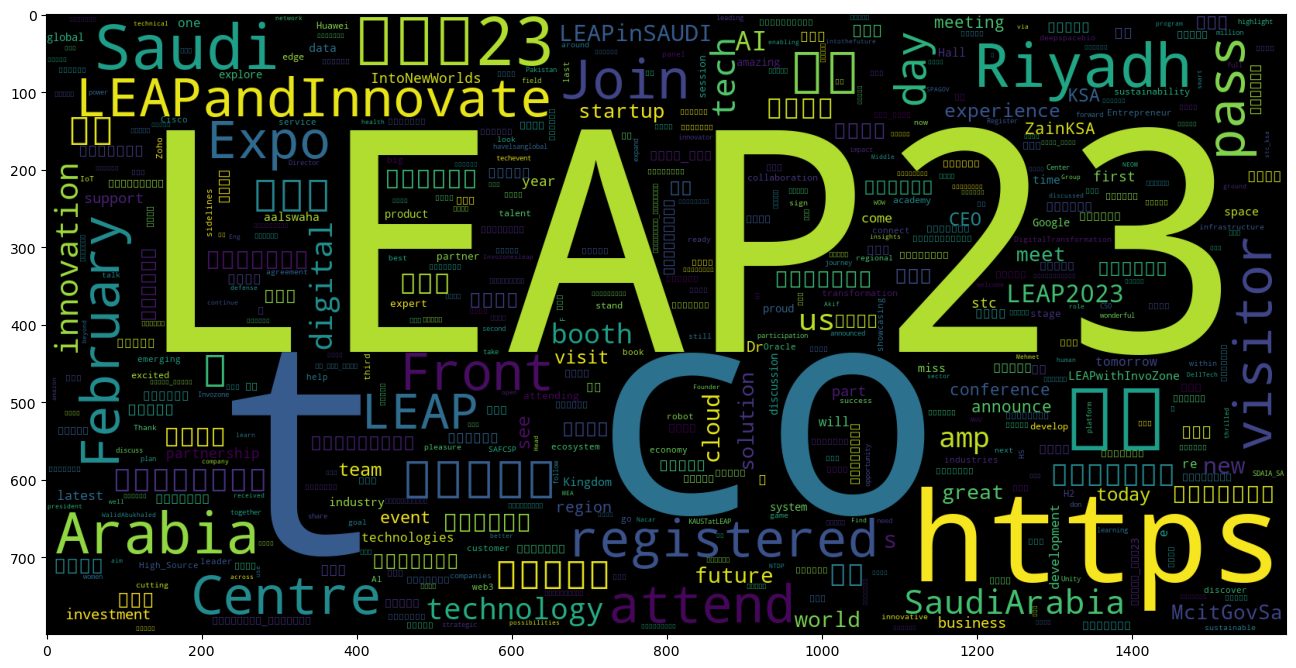

In [16]:
#word cloud 
plt.figure(figsize = (16,16))
wc = WordCloud(max_words = 500 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(leap["Processed_Tweets"]))
plt.imshow(wc)

# Sentiment Analysis

In [17]:
# Function for polarity score
def polarity(Processed_Tweets):
    return TextBlob(Processed_Tweets).sentiment.polarity

# Function to get sentiment type
#setting the conditions
def sentimenttextblob(polarity):
    if polarity < 0:
        return "Negative"
    elif polarity == 0:
        return "Neutral"
    else:
        return "Positive"  

In [18]:
# using the functions to get the polarity and sentiment
leap['Polarity'] = leap['Processed_Tweets'].apply(polarity)
leap['Sentiment'] = leap['Polarity'].apply(sentimenttextblob)


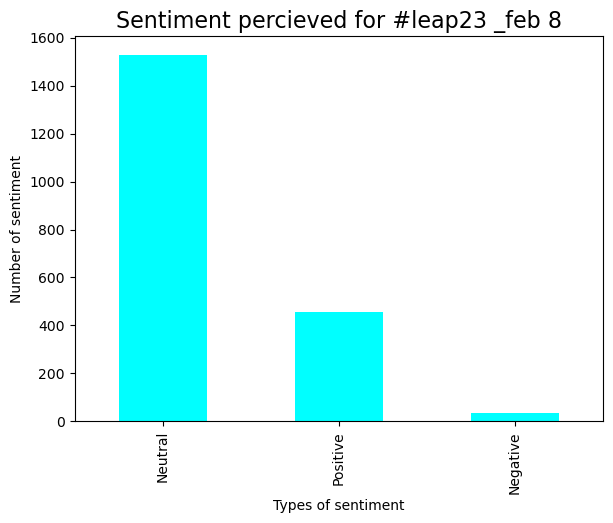

In [19]:
# plotting bar chart for the Sentiment
plt.subplot(1,2,1)
sent = leap['Sentiment'].value_counts()
sent.plot(kind='bar', color=['aqua'], figsize=(15,5))
plt.title('Sentiment percieved for #leap23 _feb 8', fontsize=16)
plt.xlabel('Types of sentiment')
plt.ylabel('Number of sentiment');

In [20]:
#save the csv file 
leap.to_csv("fep8_sentiment.csv")